In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [49]:
def System(r,x):
    
    dydx = x + 2*r
    
    return dydx

In [50]:
x = np.linspace(0., 4., 100)
r0 = 0

In [51]:
sol = odeint(System, r0, x)

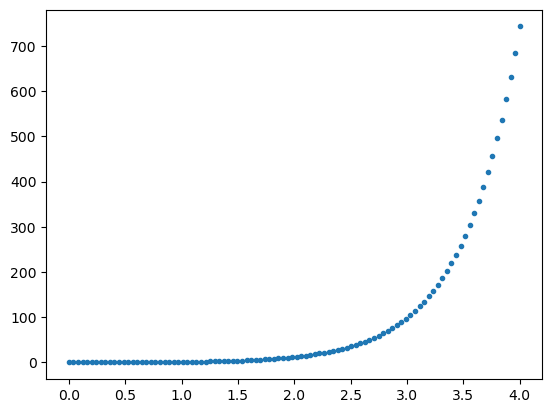

In [52]:
plt.scatter(x,sol,marker='.')

In [93]:
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    y = np.zeros_like(t)
    
    y[0] = r0
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    present = y[0]
    K11 = f(present,t[0])
    K21 = f(present+h,t[0]+h*K11)
    K31 = f(present+0.5*h,t[0]+0.5*h*K21)
    K41 = f(present+h,t[0]+h*K31)
    
    # Euler
    y[1] = y[0] + (1/6) * h*(K11+2*K21+2*K31+K41)
    
    for i in range(2,5):
        present = y[i-1]
        K11 = f(present,t[i-1])
        K21 = f(present+h,t[i-1]+h*K11)
        K31 = f(present+0.5*h,t[i-1]+0.5*h*K21)
        K41 = f(present+h,t[i-1]+h*K31)
    
        # Euler
        y[i] = y[i-1] + ( (1/6) * h *( K11+ 2*K21 + 2*K31 + K41 ) )
    
    yc = y.copy()
    
    for i in range(5,len(t)):
        
        present = y[i-1]
        past = y[i-2]
        past1 = y[i-3]
        past2 = y[i-4]
        past3 = y[i-5]
        
        K11 = f(present,t[i-1])
        K21 = f(present+h,t[i-1]+h*K11)
        K31 = f(present+0.5*h,t[i-1]+0.5*h*K21)
        K41 = f(present+h,t[i-1]+h*K31)

        K12 = f(past,t[i-2])
        K22 = f(past+h,t[i-2]+h*K12)
        K32 = f(past+0.5*h,t[i-2]+0.5*h*K22)
        K42 = f(past+h,t[i-2]+h*K32)
        
        K13 = f(past1,t[i-3])
        K23 = f(past1+h,t[i-3]+h*K13)
        K33 = f(past1+0.5*h,t[i-3]+0.5*h*K23)
        K43 = f(past1+h,t[i-3]+h*K33)
        
        K14 = f(past2,t[i-4])
        K24 = f(past2+h,t[i-4]+h*K14)
        K34 = f(past2+0.5*h,t[i-4]+0.5*h*K24)
        K44 = f(past2+h,t[i-4]+h*K34)
        
        K15 = f(past3,t[i-5])
        K25 = f(past3+h,t[i-5]+h*K15)
        K35 = f(past3+0.5*h,t[i-5]+0.5*h*K25)
        K45 = f(past3+h,t[i-5]+h*K35)
        
        y[i] = y[i-1] + (h*(1901*K41 - 2774 * K42 + 2616 * K43 - 1274 * K44 + 251 * K45 )) / 720
        
        yc[i] = y[i]
        
        # Futuro
        futuro = y[i]
        K46 = f(futuro,t[i])
        
        yc[i] = yc[i-1] + h*(475*K46 + 1427*K41 - 798*K42 + 482 * K43 - 173 * K44 + 27 * K45)/1440
    
    return y, yc

In [94]:
sol2 = IntegratorAdams(System,r0,x)
sol2

0.04040404040404041


(array([0.00000000e+00, 2.21007233e-03, 6.28075520e-03, 1.23665130e-02,
        2.06346337e-02, 3.37837197e-02, 5.01927257e-02, 6.94253042e-02,
        9.22783066e-02, 1.18974616e-01, 1.49715415e-01, 1.84935351e-01,
        2.25037115e-01, 2.70423646e-01, 3.21566323e-01, 3.78974913e-01,
        4.43195604e-01, 5.14826595e-01, 5.94519398e-01, 6.82981248e-01,
        7.80981803e-01, 8.89358573e-01, 1.00902238e+00, 1.14096398e+00,
        1.28626120e+00, 1.44608643e+00, 1.62171496e+00, 1.81453407e+00,
        2.02605279e+00, 2.25791262e+00, 2.51189917e+00, 2.78995479e+00,
        3.09419232e+00, 3.42691010e+00, 3.79060820e+00, 4.18800615e+00,
        4.62206224e+00, 5.09599442e+00, 5.61330313e+00, 6.17779609e+00,
        6.79361526e+00, 7.46526620e+00, 8.19765000e+00, 8.99609796e+00,
        9.86640938e+00, 1.08148926e+01, 1.18484099e+01, 1.29744257e+01,
        1.42010598e+01, 1.55371448e+01, 1.69922885e+01, 1.85769424e+01,
        2.03024752e+01, 2.21812536e+01, 2.42267300e+01, 2.645353

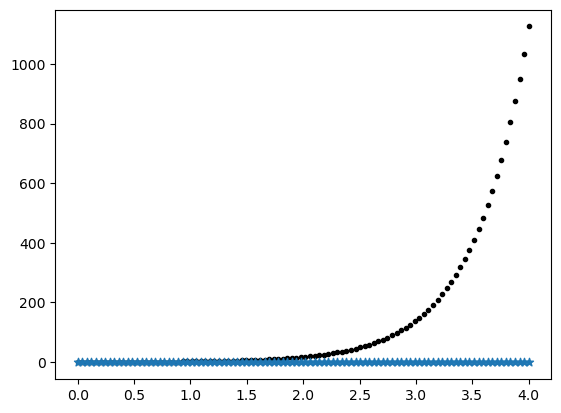

In [95]:
#plt.scatter(sol2[0],sol2[1],color='r')
plt.scatter(x,sol2[0],marker='.',color='k')
#plt.scatter(x,sol,marker='.')
plt.scatter(x,resultado_y,marker='*')

In [76]:
def calcular_resultado(x):
    resultado = -(x / 2) - ((1 - np.exp(-2 * x)) / 4)
    return resultado

resultado_y = calcular_resultado(x)


In [91]:
print(resultado_y[10],sol2[0][10])

-0.34059203851382264 0.14971541487289994


In [28]:
plt.scatter(t,sol[:,0])
plt.scatter(t,sol2[2])

NameError: name 't' is not defined

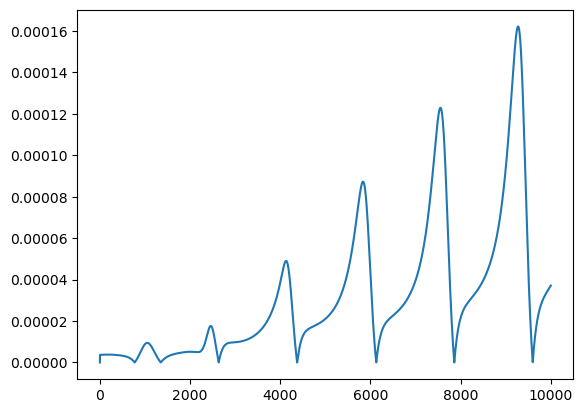

In [22]:
plt.plot(np.abs(sol2[2]-sol[:,0]))

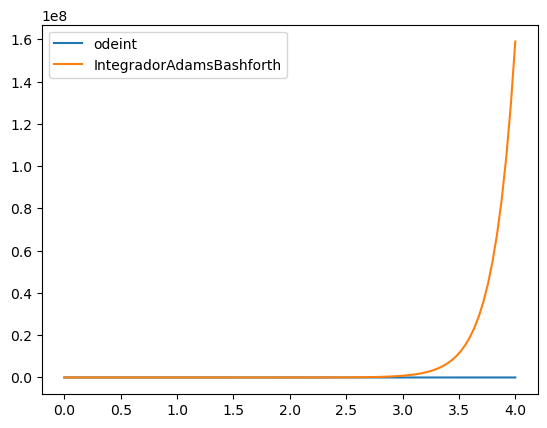

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def System(r, x):
    dydx = x + 2 * r
    return dydx

def IntegradorAdamsBashforth(f, r0, t):
    h = t[1] - t[0]
    
    y = np.zeros_like(t)
    y[0] = r0
    
    for i in range(1, 5):
        present = y[i - 1]
        K1 = f(present, t[i - 1])
        K2 = f(present + h, t[i - 1] + h * K1)
        K3 = f(present + 0.5 * h, t[i - 1] + 0.5 * h * K2)
        K4 = f(present + h, t[i - 1] + h * K3)
        
        y[i] = y[i - 1] + (h / 24) * (55 * K4 - 59 * K3 + 37 * K2 - 9 * K1)
    
    for i in range(5, len(t)):
        present = y[i - 1]
        past = y[i - 2]
        past1 = y[i - 3]
        past2 = y[i - 4]
        past3 = y[i - 5]
        
        K1 = f(present, t[i - 1])
        K2 = f(present + h, t[i - 1] + h * K1)
        K3 = f(present + 0.5 * h, t[i - 1] + 0.5 * h * K2)
        K4 = f(present + h, t[i - 1] + h * K3)
        
        K5 = f(past, t[i - 2])
        K6 = f(past + h, t[i - 2] + h * K5)
        K7 = f(past + 0.5 * h, t[i - 2] + 0.5 * h * K6)
        K8 = f(past + h, t[i - 2] + h * K7)
        
        K9 = f(past1, t[i - 3])
        K10 = f(past1 + h, t[i - 3] + h * K9)
        K11 = f(past1 + 0.5 * h, t[i - 3] + 0.5 * h * K10)
        K12 = f(past1 + h, t[i - 3] + h * K11)
        
        K13 = f(past2, t[i - 4])
        K14 = f(past2 + h, t[i - 4] + h * K13)
        K15 = f(past2 + 0.5 * h, t[i - 4] + 0.5 * h * K14)
        K16 = f(past2 + h, t[i - 4] + h * K15)
        
        K17 = f(past3, t[i - 5])
        K18 = f(past3 + h, t[i - 5] + h * K17)
        K19 = f(past3 + 0.5 * h, t[i - 5] + 0.5 * h * K18)
        K20 = f(past3 + h, t[i - 5] + h * K19)
        
        y[i] = y[i - 1] + (h / 720) * (251 * K4 + 646 * K3 - 264 * K2 + 106 * K1 - 19 * K5 + 270 * K6 - 330 * K7 + 460 * K8 - 82 * K9 + 580 * K10 - 860 * K11 + 1360 * K12 - 630 * K13 + 2360 * K14 - 1960 * K15 + 686 * K16 - 42 * K17 + 322 * K18 - 196 * K19 + 40 * K20)
    
    return y

x = np.linspace(0., 4., 100)
r0 = 0

sol = odeint(System, r0, x)
sol2 = IntegradorAdamsBashforth(System, r0, x)

plt.plot(x, sol, label='odeint')
plt.plot(x, sol2, label='IntegradorAdamsBashforth')
plt.legend()
plt.show()
